In [26]:
#Third Year Paper Code
import numpy as np
import random 
import matplotlib.pyplot as plt

In [27]:
# Simulation Setting
# Based on DO (1999) lab setting
# with u = 100
# start with production good in storage
# constant gain learning with gamma = 0.7

In [28]:
#Basic Parameters
u = 100
β = 0.9
c_1 = 1
c_2 = 4
c_3 = 9
t = 1
γ = 0.6

In [29]:
#initial value for Q
#When initial condition is production good in storage
#based on rational expectation
shock = 0
Q_12 = 65 + shock
Q_13 = 103 + shock
Q_11 = Q_12 + u
Q_21 = 256 + shock
Q_23 = 244 + shock
Q_22 = Q_23 + u
Q_31 = 290 + shock
Q_32 = 230 + shock
Q_33 = Q_31 + u

In [74]:
# Create agents
# Agents have there type which same as there consumption type, they also have production type
class Agent:
    agentCount = 0

    def __init__(self, id, consume_type, product_type):
        self.id = id
        self.consume_type = consume_type
        self.product_type = product_type
        self.storage_type = product_type
        self.opposite_storage = 0
        self.trading_result = False
        self.trading = False
        self.original_storage = self.storage_type

        #generate type 1 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 1:
            self.Q_2 = 65 + random.randint(1,20)
        if self.consume_type == 1:
            self.Q_3 = 103 + random.randint(1,20)
        if self.consume_type == 1:
            self.Q_1 = 9999
            
        #generate type 2 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 2:
            self.Q_1 = 256 + random.randint(1,50)
        if self.consume_type == 2:
            self.Q_3 = 244 + random.randint(1,50)
        if self.consume_type == 2:
            self.Q_2 = 9999
            
        #generate type 3 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 3:
            self.Q_1 = 290
        if self.consume_type == 3:
            self.Q_2 = 230 + random.randint(1,35)
        if self.consume_type == 3:
            self.Q_3 = 9999

        # other characteristics wait to be added
        Agent.agentCount += 1

    def displayAgent(self):
        print("Agent id:", self.id, "consume:", self.consume_type, ",produce:", self.product_type, ",storage:",
              self.storage_type, "Q_1:", self.Q_1, "Q_2:", self.Q_2, "Q_3:", self.Q_3,"opposite:",self.opposite_storage,"trading:",self.trading,"trading_reuslt:",self.trading_result)

        


In [31]:
# matching process
# update agent's information of what situation he is facing
def match(mylist):
    random.shuffle(mylist)
    matchlist = dict()
    index = list(range(0, len(mylist), 2))
    for i in index:
        matchlist[mylist[i]] = mylist[i + 1]
    for key in matchlist:
        update_opposite_storage(key,matchlist[key]) 
        key.original_storage = key.storage_type #easy to update Q at the end of the round
        matchlist[key].original_storage = matchlist[key].storage_type
    return matchlist

# update what good the other agent is holding
def update_opposite_storage(agent1, agent2):
    storage_1 = agent1.storage_type
    storage_2 = agent2.storage_type
    agent1.opposite_storage = storage_2
    agent2.opposite_storage = storage_1

In [32]:
#get the parameters for decision making and updating Q
def get_Q_hold(agent):
    if agent.storage_type == 1:
        return agent.Q_1
    elif agent.storage_type == 2:
        return agent.Q_2
    elif agent.storage_type == 3:
        return agent.Q_3

def get_original_Q_hold(agent):
    if agent.original_storage == 1:
        return agent.Q_1
    elif agent.original_storage == 2:
        return agent.Q_2
    elif agent.original_storage == 3:
        return agent.Q_3

def set_Q_hold(agent,update_value):
    if agent.storage_type == 1:
        agent.Q_1 = update_value
    elif agent.storage_type == 2:
        agent.Q_2 = update_value
    elif agent.storage_type == 3:
        agent.Q_3 = update_value
        
def set_original_Q_hold(agent,update_value):
    if agent.original_storage == 1:
        agent.Q_1 = update_value
    elif agent.original_storage == 2:
        agent.Q_2 = update_value
    elif agent.original_storage == 3:
        agent.Q_3 = update_value

def get_Q_trade(agent):
    if agent.opposite_storage == 1:
        return agent.Q_1
    elif agent.opposite_storage == 2:
        return agent.Q_2
    elif agent.opposite_storage == 3:
        return agent.Q_3

def get_C_hold(agent):
    if agent.storage_type == 1:
        return c_1
    elif agent.storage_type == 2:
        return c_2
    elif agent.storage_type == 3:
        return c_3

def get_C_trade(agent):
    if agent.opposite_storage == 1:
        return c_1
    elif agent.opposite_storage == 2:
        return c_2
    elif agent.opposite_storage == 3:
        return c_3


In [33]:
# trading decision by each agent
def transaction_decision(agent):
    Q_hold = get_Q_hold(agent)
    Q_trade = get_Q_trade(agent)
    C_hold = get_C_hold(agent)
    C_trade = get_C_trade(agent)

    if β * Q_hold - C_hold < β * Q_trade - C_trade:
        agent.trading = True
    else:
        agent.trading = False
        
# trading results 
def produce_outcome(matched_list):
    trade_outcome = list()
    for key in matched_list.keys():
        if key.trading == True and matched_list[key].trading == True:
            trade_outcome.append(True)
            key.trading_result = True
            matched_list[key].trading_result = True
        else:
            trade_outcome.append(False)
            key.trading_result = False
            matched_list[key].trading_result = False
    return trade_outcome



In [34]:
# based on trading result, updates Q and storage

def update_trading(agent):
    if(agent.trading_result == False): #if there is trade
        v_prime = get_C_hold(agent)*(-1) + β * get_Q_hold(agent)
        updated_value = get_Q_hold(agent) + γ * (v_prime - get_Q_hold(agent))
        set_Q_hold(agent,updated_value)
    else: #if trade happened 
        if agent.consume_type == agent.opposite_storage: #agent gets his own consumption good
            agent.storage_type = agent.product_type #agent eats the consumption good and produces another production good 
            v_prime = get_C_hold(agent) * (-1) + β * get_Q_hold(agent) + u
            updated_value = get_original_Q_hold(agent) + γ * (v_prime - get_original_Q_hold(agent))
            set_original_Q_hold(agent,updated_value)
        else: #agent does not get his cons good
            agent.storage_type = agent.opposite_storage 
            v_prime = get_C_hold(agent) *(-1) + β * get_Q_hold(agent)
            updated_value = get_original_Q_hold(agent) + γ * (v_prime - get_original_Q_hold(agent))
            set_original_Q_hold(agent, updated_value)

In [35]:
# Global behavior recorder

def global_a1_s2_f3(mylist,count_down,count_up): #agent 1 holding 2 facing opportunity for 3
    result = list()
    for ele in mylist:
        if (ele.consume_type == 1 and ele.storage_type == 2 and ele.opposite_storage == 3):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a2_s3_f1(mylist,count_down,count_up): #agent 2 holding 3 facing opportunity for 1
    result = list()
    for ele in mylist:
        if (ele.consume_type == 2 and ele.storage_type == 3 and ele.opposite_storage == 1):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a3_s1_f2(mylist,count_down,count_up): #agent 3 holding 1 facing opportunity for 2
    result = list()
    for ele in mylist:
        if (ele.consume_type == 3 and ele.storage_type == 1 and ele.opposite_storage == 2):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a1_s_f1(mylist,count_down,count_up): #agent 1 holding ANY good facing opportunity for 1
    result = list()
    for ele in mylist:
        if (ele.consume_type == 1  and ele.opposite_storage == 1):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a2_s_f2(mylist,count_down,count_up): #agent 2 holding ANY good facing opportunity for 2
    result = list()
    for ele in mylist:
        if (ele.consume_type == 2  and ele.opposite_storage ==2 ):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a3_s_f3(mylist,count_down,count_up): #agent 3 holding ANY good facing opportunity for 3
    result = list()
    for ele in mylist:
        if (ele.consume_type == 3  and ele.opposite_storage ==3 ):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

In [24]:
# main code

if __name__ == '__main__':
    u = 100
    β = 0.9
    c_1 = 1
    c_2 = 4
    c_3 = 9
    t = 1

    mylist = list()
    agent1 = Agent(1, 1, 2)
    mylist.append(agent1)
    agent2 = Agent(2, 1, 2)
    mylist.append(agent2)
    agent3 = Agent(3, 1, 2)
    mylist.append(agent3)
    agent4 = Agent(4, 1, 2)
    mylist.append(agent4)
    agent5 = Agent(5, 1, 2)
    mylist.append(agent5)
    agent6 = Agent(6, 1, 2)
    mylist.append(agent6)
    agent7 = Agent(7, 1, 2)
    mylist.append(agent7)
    agent8 = Agent(8, 1, 2)
    mylist.append(agent8)
    agent9 = Agent(9, 2, 3)
    mylist.append(agent9)
    agent10 = Agent(10, 2, 3)
    mylist.append(agent10)
    agent11 = Agent(11, 2, 3)
    mylist.append(agent11)
    agent12 = Agent(12, 2, 3)
    mylist.append(agent12)
    agent13 = Agent(13, 2, 3)
    mylist.append(agent13)
    agent14 = Agent(14, 2, 3)
    mylist.append(agent14)
    agent15 = Agent(15, 2, 3)
    mylist.append(agent15)
    agent16 = Agent(16, 2, 3)
    mylist.append(agent16)
    agent17 = Agent(17, 3, 1)
    mylist.append(agent17)
    agent18 = Agent(18, 3, 1)
    mylist.append(agent18)
    agent19 = Agent(19, 3, 1)
    mylist.append(agent19)
    agent20 = Agent(20, 3, 1)
    mylist.append(agent20)
    agent21 = Agent(21, 3, 1)
    mylist.append(agent21)
    agent22 = Agent(22, 3, 1)
    mylist.append(agent22)
    agent23 = Agent(23, 3, 1)
    mylist.append(agent23)
    agent24 = Agent(24, 3, 1)
    mylist.append(agent24)

    game_continue = True

    count_round = 0
    sum_up123 = 0
    sum_down123 = 0
    sum_up231 = 0
    sum_down231 = 0
    sum_up312 = 0
    sum_down312 = 0
    
    result_list_123_each_round = []
    result_list_123_sum = []
    result_list_231_each_round = []
    result_list_231_sum = []
    result_list_312_each_round = []
    result_list_312_sum = []
    
    
    sum_up11 = 0
    sum_down11 = 0
    sum_up22 = 0
    sum_down22 = 0
    sum_up33 = 0
    sum_down33 = 0
    
    t_list = []
    
    while(count_round < 140):
        count_round += 1
        t_list.append(count_round)
        matched_list = match(mylist)

        for key in matched_list.keys():
            transaction_decision(key)
            transaction_decision(matched_list[key])

        global_r1_2_3 = global_a1_s2_f3(mylist,0,0)
        sum_up123 = sum_up123 + global_r1_2_3[0]
        sum_down123 = sum_down123 + global_r1_2_3[1]
        result_list_123_each_round.append( (global_r1_2_3[0]+0.1) / (global_r1_2_3[1]+0.1) )
        result_list_123_sum.append((sum_up123+0.1)/(sum_down123+0.1))
        
        global_r2_3_1 = global_a2_s3_f1(mylist,0,0)
        sum_up231 = sum_up231 + global_r2_3_1[0]
        sum_down231 = sum_down231 + global_r2_3_1[1]
        result_list_231_each_round.append( (global_r2_3_1[0]+0.1) / (global_r2_3_1[1]+0.1) )
        result_list_231_sum.append((sum_up231+0.1)/(sum_down231+0.1))
        
        global_r3_1_2 = global_a3_s1_f2(mylist,0,0)
        sum_up312 = sum_up312 + global_r3_1_2[0]
        sum_down312 = sum_down312 + global_r3_1_2[1]
        result_list_312_each_round.append( (global_r3_1_2[0]+0.1) / (global_r3_1_2[1]+0.1) )
        result_list_312_sum.append((sum_up312+0.1)/(sum_down312+0.1))
        
        global_r1_1 = global_a1_s_f1(mylist,0,0)
        sum_up11 = sum_up11 + global_r1_1[0]
        sum_down11 = sum_down11 + global_r1_1[1]
        
        global_r2_2 = global_a2_s_f2(mylist,0,0)
        sum_up22 = sum_up22 + global_r2_2[0]
        sum_down22 = sum_down22 + global_r2_2[1]
        
        global_r3_3 = global_a3_s_f3(mylist,0,0)
        sum_up33 = sum_up33 + global_r3_3[0]
        sum_down33 = sum_down33 + global_r3_3[1]
        
        

        #for ele in mylist:
            #ele.displayAgent()

        produce_outcome(matched_list)

        for key in matched_list.keys():
            update_trading(key)
            update_trading(matched_list[key])

        #print(count_round)

        stopping_draw = random.uniform(0, 1)
        if stopping_draw > 0.01:
            game_continue = True
        else:
            game_continue = False

    print("Agent 1 with good 2 facing good 3:", sum_up123/sum_down123)
    print("Agent 2 with good 3 facing good 1:", sum_up231/sum_down231)
    print("Agent 3 with good 1 facing good 2:", sum_up312/sum_down312)
    
    print("Agent 1 facing good 1:", sum_up11/sum_down11)
    print("Agent 2 facing good 2:", sum_up22/sum_down22)
    print("Agent 3 facing good 3:", sum_up33/sum_down33)
    
    

Agent 1 with good 2 facing good 3: 0.384297520661157
Agent 2 with good 3 facing good 1: 0.923728813559322
Agent 3 with good 1 facing good 2: 0.28668941979522183
Agent 1 facing good 1: 1.0
Agent 2 facing good 2: 1.0
Agent 3 facing good 3: 0.9856115107913669


Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: -9.735196855063208 Q_3: -16.43314933767508 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 6.307548843032981 Q_3: 14.107705373123038 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: -1.1836747359857913 Q_3: 10.123563747650149 opposite: 1 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 33.62572570498126 Q_3: 10.379322011321857 opposite: 1 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: -3.0679119583778145 Q_3: -1.2714290424938293 opposite: 1 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: -9.283438767160611 Q_3: -9.649600512647975 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 24.556725651353307

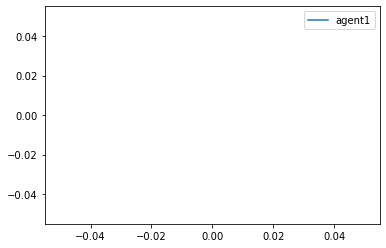

In [21]:
for ele in mylist:
    if ele.consume_type == 1:
        ele.displayAgent()

plt.plot(result_list_123_each_round[4900:4999], label = "agent1")
#plt.plot(result_list_231_each_round[9900:9999], label = "agent2")
#plt.plot(result_list_312_each_round[9900:9999], label = "agent3")
plt.legend()
#plt.xlabel("t")
#plt.ylabel("Percentage")
plt.show()

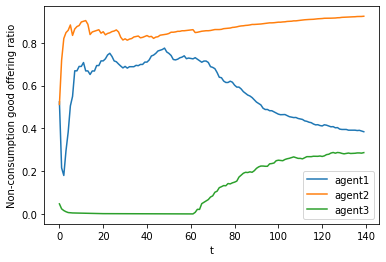

In [25]:
#plot the dynamic of the behavior

#plt.plot(result_list_123_each_round)
plt.plot(result_list_123_sum, label = "agent1")
#plt.plot(result_list_123_each_round)
plt.plot(result_list_231_sum, label = "agent2")
#plt.plot(result_list_123_each_round)
plt.plot(result_list_312_sum, label = "agent3")
plt.legend()
plt.xlabel("t")
plt.ylabel("Non-consumption good offering ratio")
plt.show()

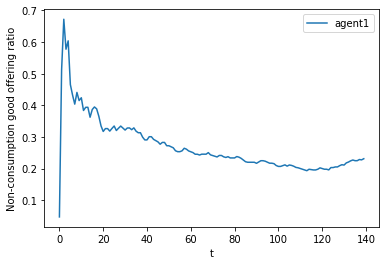

In [113]:
#plt the best responds of the behavior
plt.plot(result_list_123_sum, label = "agent1")
plt.legend()
plt.xlabel("t")
plt.ylabel("Non-consumption good offering ratio")
plt.show()

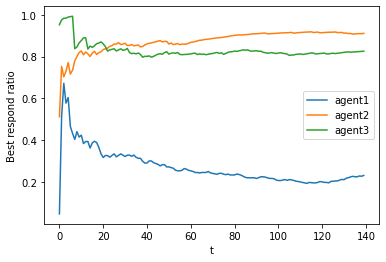

In [115]:
#best respond graph
br_312 = result_list_312_sum
for i in range(len(br_312)):
    br_312[i] = 1 - br_312[i] 
plt.plot(result_list_123_sum, label = "agent1")
plt.plot(result_list_231_sum, label = "agent2")
plt.plot(br_312, label = "agent3")
plt.legend()
plt.xlabel("t")
plt.ylabel("Best respond ratio")
plt.show()

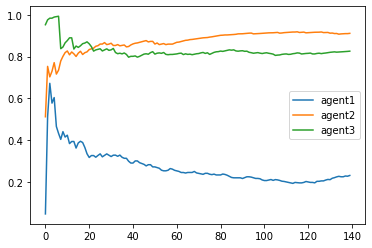

In [116]:
#best respond for a shorter period
period_long = 140
data_agent1_150 = np.zeros(period_long)
data_agent2_150 = np.zeros(period_long)
data_agent3_150 = np.zeros(period_long)
for i in range(period_long):
    data_agent1_150[i] = result_list_123_sum[i]
    data_agent2_150[i] = result_list_231_sum[i]
    data_agent3_150[i] = br_312[i]
    
plt.plot(data_agent1_150, label = "agent1")
plt.plot(data_agent2_150, label = "agent2")
plt.plot(data_agent3_150, label = "agent3")  
plt.legend()
plt.show()



/Users/hongjianwang/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/hongjianwang/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

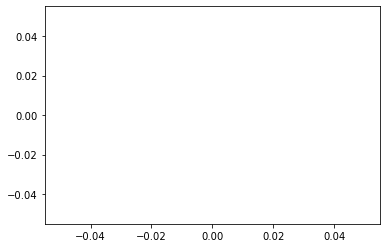

In [119]:
# n periods average 
n_period = 10
n_period_average = list()

for i in range (len(result_list_123_each_round)):
    n_period_average.append(sum(result_list_123_each_round[i:i+n_period]))

plt.plot(n_period_average[999000:999999])
np.average(n_period_average[999000:999999])

In [98]:
#10 times 
loop_counter = 0
outcome_recorder_123 = []
outcome_recorder_231 = []
outcome_recorder_312 = []
while loop_counter < 100:
    # main code
    loop_counter = loop_counter + 1
    print(loop_counter)

    if __name__ == '__main__':
        u = 100
        β = 0.9
        c_1 = 1
        c_2 = 4
        c_3 = 9
        t = 1
        γ = 0.5

        mylist = list()
        agent1 = Agent(1, 1, 2)
        mylist.append(agent1)
        agent2 = Agent(2, 1, 2)
        mylist.append(agent2)
        agent3 = Agent(3, 1, 2)
        mylist.append(agent3)
        agent4 = Agent(4, 1, 2)
        mylist.append(agent4)
        agent5 = Agent(5, 1, 2)
        mylist.append(agent5)
        agent6 = Agent(6, 1, 2)
        mylist.append(agent6)
        agent7 = Agent(7, 1, 2)
        mylist.append(agent7)
        agent8 = Agent(8, 1, 2)
        mylist.append(agent8)
        agent9 = Agent(9, 2, 3)
        mylist.append(agent9)
        agent10 = Agent(10, 2, 3)
        mylist.append(agent10)
        agent11 = Agent(11, 2, 3)
        mylist.append(agent11)
        agent12 = Agent(12, 2, 3)
        mylist.append(agent12)
        agent13 = Agent(13, 2, 3)
        mylist.append(agent13)
        agent14 = Agent(14, 2, 3)
        mylist.append(agent14)
        agent15 = Agent(15, 2, 3)
        mylist.append(agent15)
        agent16 = Agent(16, 2, 3)
        mylist.append(agent16)
        agent17 = Agent(17, 3, 1)
        mylist.append(agent17)
        agent18 = Agent(18, 3, 1)
        mylist.append(agent18)
        agent19 = Agent(19, 3, 1)
        mylist.append(agent19)
        agent20 = Agent(20, 3, 1)
        mylist.append(agent20)
        agent21 = Agent(21, 3, 1)
        mylist.append(agent21)
        agent22 = Agent(22, 3, 1)
        mylist.append(agent22)
        agent23 = Agent(23, 3, 1)
        mylist.append(agent23)
        agent24 = Agent(24, 3, 1)
        mylist.append(agent24)

        game_continue = True

        count_round = 0
        sum_up123 = 0
        sum_down123 = 0
        sum_up231 = 0
        sum_down231 = 0
        sum_up312 = 0
        sum_down312 = 0

        result_list_123_each_round = []
        result_list_123_sum = []
        result_list_231_each_round = []
        result_list_231_sum = []
        result_list_312_each_round = []
        result_list_312_sum = []


        sum_up11 = 0
        sum_down11 = 0
        sum_up22 = 0
        sum_down22 = 0
        sum_up33 = 0
        sum_down33 = 0

        t_list = []

        while(count_round < 140):
            count_round += 1
            t_list.append(count_round)
            matched_list = match(mylist)

            for key in matched_list.keys():
                transaction_decision(key)
                transaction_decision(matched_list[key])

            global_r1_2_3 = global_a1_s2_f3(mylist,0,0)
            sum_up123 = sum_up123 + global_r1_2_3[0]
            sum_down123 = sum_down123 + global_r1_2_3[1]
            result_list_123_each_round.append( (global_r1_2_3[0]+0.1) / (global_r1_2_3[1]+0.1) )
            result_list_123_sum.append((sum_up123+0.1)/(sum_down123+0.1))

            global_r2_3_1 = global_a2_s3_f1(mylist,0,0)
            sum_up231 = sum_up231 + global_r2_3_1[0]
            sum_down231 = sum_down231 + global_r2_3_1[1]
            result_list_231_each_round.append( (global_r2_3_1[0]+0.1) / (global_r2_3_1[1]+0.1) )
            result_list_231_sum.append((sum_up231+0.1)/(sum_down231+0.1))

            global_r3_1_2 = global_a3_s1_f2(mylist,0,0)
            sum_up312 = sum_up312 + global_r3_1_2[0]
            sum_down312 = sum_down312 + global_r3_1_2[1]
            result_list_312_each_round.append( (global_r3_1_2[0]+0.1) / (global_r3_1_2[1]+0.1) )
            result_list_312_sum.append((sum_up312+0.1)/(sum_down312+0.1))

            global_r1_1 = global_a1_s_f1(mylist,0,0)
            sum_up11 = sum_up11 + global_r1_1[0]
            sum_down11 = sum_down11 + global_r1_1[1]

            global_r2_2 = global_a2_s_f2(mylist,0,0)
            sum_up22 = sum_up22 + global_r2_2[0]
            sum_down22 = sum_down22 + global_r2_2[1]

            global_r3_3 = global_a3_s_f3(mylist,0,0)
            sum_up33 = sum_up33 + global_r3_3[0]
            sum_down33 = sum_down33 + global_r3_3[1]



            #for ele in mylist:
                #ele.displayAgent()

            produce_outcome(matched_list)

            for key in matched_list.keys():
                update_trading(key)
                update_trading(matched_list[key])

            #print(count_round)

            stopping_draw = random.uniform(0, 1)
            if stopping_draw > 0.01:
                game_continue = True
            else:
                game_continue = False

        #print("Agent 1 with good 2 facing good 3:", sum_up123/sum_down123)
        #print("Agent 2 with good 3 facing good 1:", sum_up231/sum_down231)
        #print("Agent 3 with good 1 facing good 2:", sum_up312/sum_down312)

        #print("Agent 1 facing good 1:", sum_up11/sum_down11)
        #print("Agent 2 facing good 2:", sum_up22/sum_down22)
        #print("Agent 3 facing good 3:", sum_up33/sum_down33)
    outcome_recorder_123.append(sum_up123/sum_down123)
    outcome_recorder_231.append(sum_up231/sum_down231)
    outcome_recorder_312.append(sum_up312/sum_down312)
    
    



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


<function matplotlib.pyplot.show(close=None, block=None)>

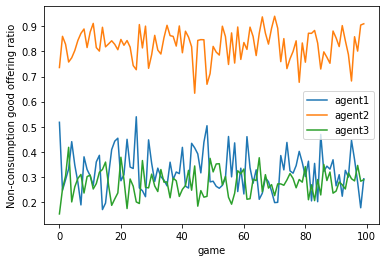

In [103]:
#print(outcome_recorder_123)
#print(outcome_recorder_231)
#print(outcome_recorder_312)
plt.plot(outcome_recorder_123, label = "agent1")
plt.plot(outcome_recorder_231, label = "agent2")
plt.plot(outcome_recorder_312, label = "agent3")
plt.legend()
plt.xlabel("game")
plt.ylabel("Non-consumption good offering ratio")
plt.show

In [100]:
#Multiple session Statistics 
print(sum(outcome_recorder_123) / loop_counter)
print(np.std(outcome_recorder_123))

0.32437496263264154
0.08081612069976515


In [101]:
print(sum(outcome_recorder_231) / loop_counter)
print(np.std(outcome_recorder_231))

0.8255106436311092
0.061298595048672105


In [102]:
print(sum(outcome_recorder_312) / loop_counter)
print(np.std(outcome_recorder_312))

0.2751341377962011
0.05059786466080101
